In [1]:
# Installation of paddle github repository 
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple


Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 689.6 MB 18 kB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0


In [3]:
# Install paddle OCR
!pip install paddleocr
!pip install paddlepaddle
!pip install "paddleocr>=2.0.6"

     |████████████████████████████████| 108.4 MB 26 kB/s 


In [4]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [48]:
from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
import cv2 
import os 

# Initialization of Model and Detection

In [47]:
# Setup model
ocr_model = PaddleOCR(lang='en')

[2022/01/04 05:18:50] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2022/01/04 05:18:50] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2022/01/04 05:18:50] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_t

In [49]:
img_path = os.path.join('.', 'medicine2.jpg')

In [50]:
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path)

[2022/01/04 05:19:21] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/01/04 05:19:21] root DEBUG: dt_boxes num : 16, elapse : 0.25626325607299805
[2022/01/04 05:19:22] root DEBUG: rec_res num  : 16, elapse : 0.6015512943267822


In [51]:
result

[[[[74.0, 104.0], [215.0, 104.0], [215.0, 132.0], [74.0, 132.0]],
  ('CVS/pharmacy.', 0.9613193)],
 [[[329.0, 106.0], [404.0, 113.0], [402.0, 131.0], [327.0, 123.0]],
  ('macao300', 0.8206315)],
 [[[71.0, 171.0], [215.0, 170.0], [215.0, 187.0], [71.0, 189.0]],
  ('WARFARIN SODIUN', 0.93485284)],
 [[[325.0, 172.0], [427.0, 172.0], [427.0, 186.0], [325.0, 186.0]],
  ('KODIUM5MG', 0.9661488)],
 [[[67.0, 220.0], [219.0, 217.0], [219.0, 239.0], [67.0, 243.0]],
  ('ETAKE 1 TABLETEI', 0.84104294)],
 [[[324.0, 218.0], [429.0, 218.0], [429.0, 239.0], [324.0, 239.0]],
  ('BLETEVERY', 0.9987988)],
 [[[68.0, 237.0], [109.0, 240.0], [108.0, 259.0], [67.0, 256.0]],
  ('DAY', 0.9991364)],
 [[[74.0, 303.0], [216.0, 300.0], [216.0, 322.0], [74.0, 325.0]],
  ('Store Phone914]69', 0.9017112)],
 [[[324.0, 300.0], [431.0, 300.0], [431.0, 321.0], [324.0, 321.0]],
  ('314693-9191', 0.9551577)],
 [[[76.0, 325.0], [163.0, 328.0], [163.0, 344.0], [76.0, 340.0]],
  ('Rx830049', 0.95562845)]]

In [52]:
for res in result:
    print(res[1][0]) 

CVS/pharmacy.
macao300
WARFARIN SODIUN
KODIUM5MG
ETAKE 1 TABLETEI
BLETEVERY
DAY
Store Phone914]69
314693-9191
Rx830049


# Visualization of Results

In [53]:
# Extracting detected components
boxes = [res[0] for res in result] 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [54]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [55]:
# imports image
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

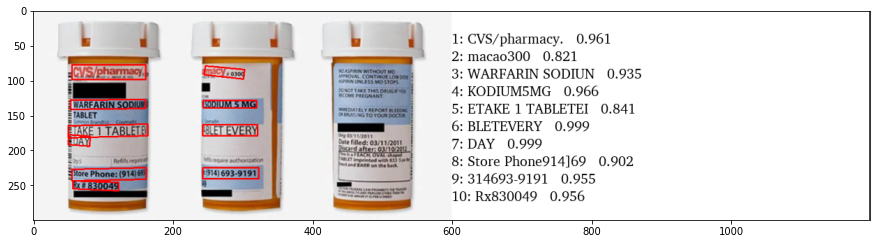

In [56]:
# Visualize image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# display the image using matplotlib
plt.imshow(annotated) 

In [57]:
img.shape

(400, 800, 3)